#  Emergency 911 Calls

Dados : [Kaggle](https://www.kaggle.com/mchirico/montcoalert).


**Variáveis:**
* lat : Latitude
* lng: Longitude
* desc: Descriçao da ligaçao
* zip: Zipcode
* title: Titulo
* timeStamp: Data, formato YYYY-MM-DD HH:MM:SS
* twp: Municipio
* addr: Endereço
* e: Dummy variable (always 1)

## Pacotes e dados

____
**Importando pacote de dados**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Leitura e compreensao dos dados**

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Análise exploratória

**Os 5 Zipcodes que mais ligam**

In [5]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**Os 5 municipios que mais ligam**

In [6]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Quantidade unica de motivos pelas ligaçoes**

In [7]:
df['title'].nunique()

110

## Transformação dos dados

**Separando a classificaçao do motivo da ligaçao** 

In [8]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

**Classificaçao dos motivos**

In [9]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**N° de ocorrencias por motivos**

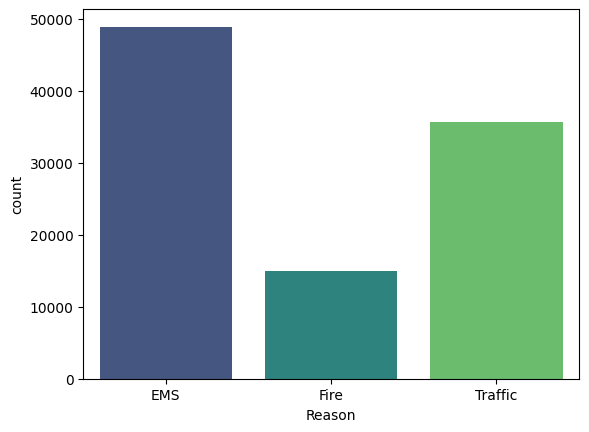

In [10]:
sns.countplot(data = df, x= 'Reason', hue = 'Reason', palette = 'viridis')
plt.style.use('default')

**Transformando string em data**

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Separando o formato de data em mes, hora, e dia da semana**

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Classificando os dias da semana**

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**N° de ocorrencias por dia da semana separados pelos motivos**

<Axes: xlabel='Day of Week', ylabel='count'>

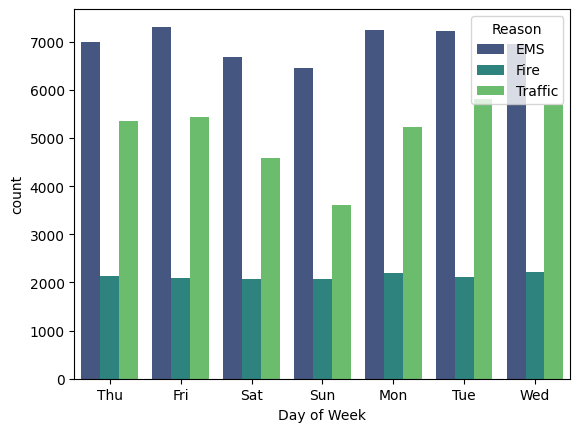

In [16]:
sns.countplot(data = df, x = 'Day of Week', hue= 'Reason', palette = 'viridis')

**N° de ocorrencias por mes e separados pelos motivos**

<Axes: xlabel='Month', ylabel='count'>

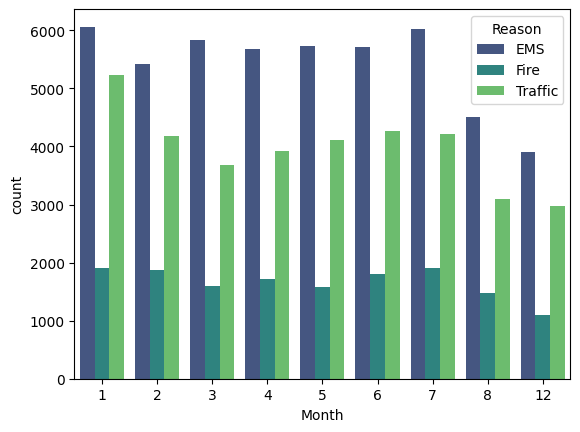

In [17]:
sns.countplot(data = df, x = 'Month', hue = 'Reason', palette = 'viridis')

**Criando uma variavel agrupada por mes**

In [18]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**N° de ligaçoes por mes**

<Axes: xlabel='Month'>

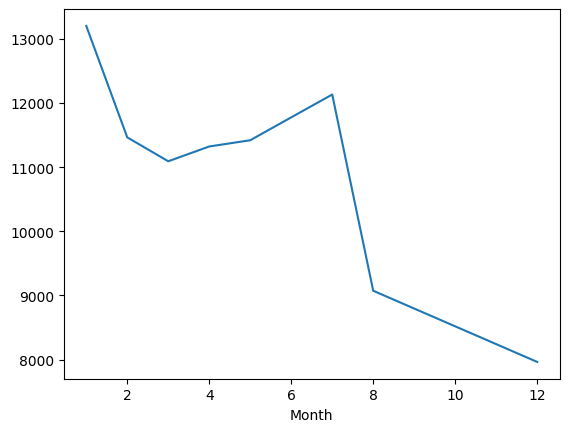

In [19]:
byMonth['twp'].plot()

**Criando um ajuste linear para as ligaçoes por mes**

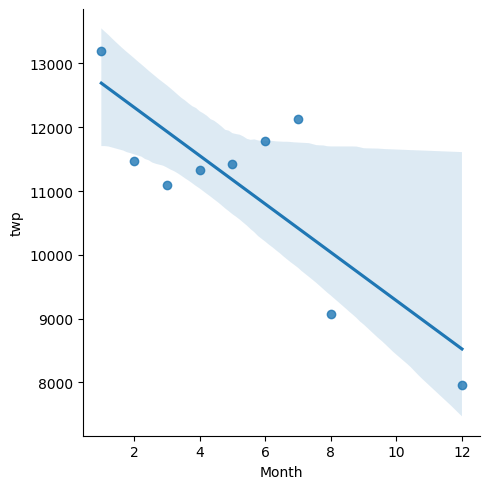

In [20]:
sns.lmplot(data = byMonth.reset_index(), x = 'Month', y = 'twp')

**Criando uma variavel que armazena a data** 

In [21]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

**N° de ligaçoes agrupadas por data**

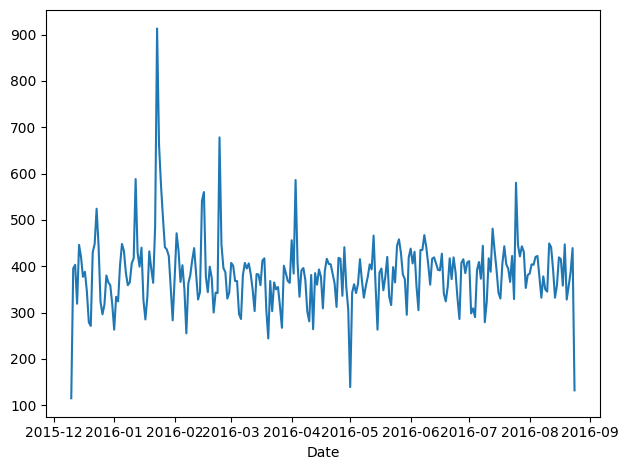

In [22]:
df.groupby('Date').count() \
['twp'].plot()

plt.tight_layout()

**N° de ligaçoes por data separados pelos motivos**

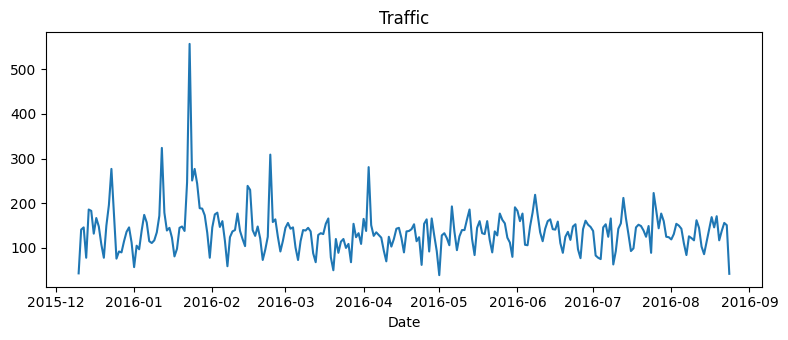

In [47]:
plt.figure(figsize=(8,3.5))

df[df['Reason'] == 'Traffic'] \
.groupby('Date') \
.count() \
['twp'].plot()

plt.title('Traffic')
plt.tight_layout()

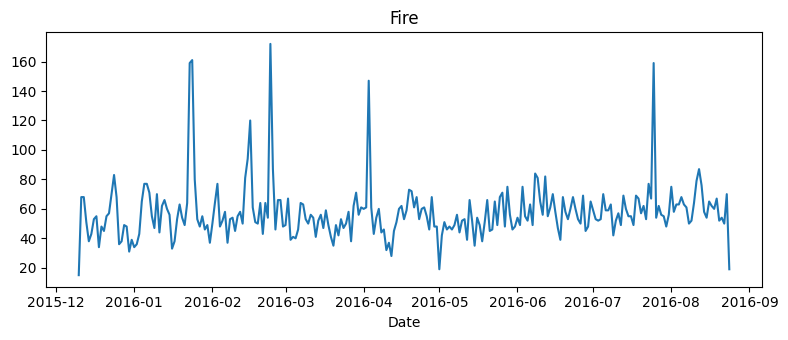

In [49]:
plt.figure(figsize=(8,3.5))
df[df['Reason'] == 'Fire'] \
.groupby('Date') \
.count() \
['twp'].plot()

plt.title('Fire')
plt.tight_layout()

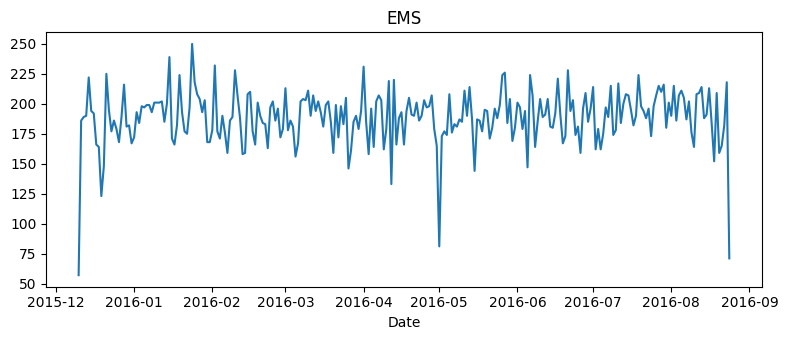

In [48]:
plt.figure(figsize=(8,3.5))
df[df['Reason'] == 'EMS'] \
.groupby('Date') \
.count() \
['twp'].plot()

plt.title('EMS')
plt.tight_layout()

**Reestruturando o dataframe, onde as linhas sao os dias da semana, e as colunas as horas**

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [27]:
dayHour = df.pivot_table(index='Day of Week', columns= 'Hour', values = 'Reason', aggfunc = 'count')
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Mapa de calor desse novo dataframe, que indica o n° de ligaçoes por dia da semana e a hora em que ocorreram**

<Axes: xlabel='Hour', ylabel='Day of Week'>

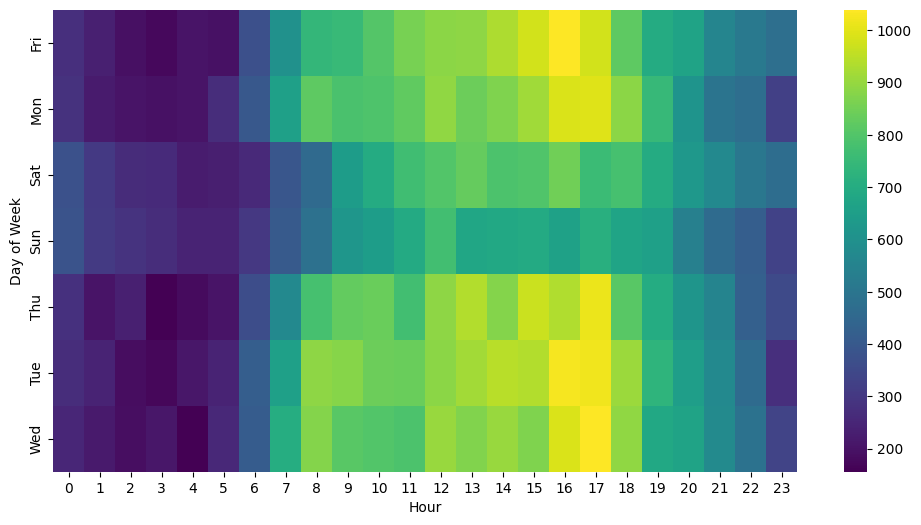

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(data = dayHour, cmap = 'viridis')

**Mesmo mapa de calor, porem clusterizado**

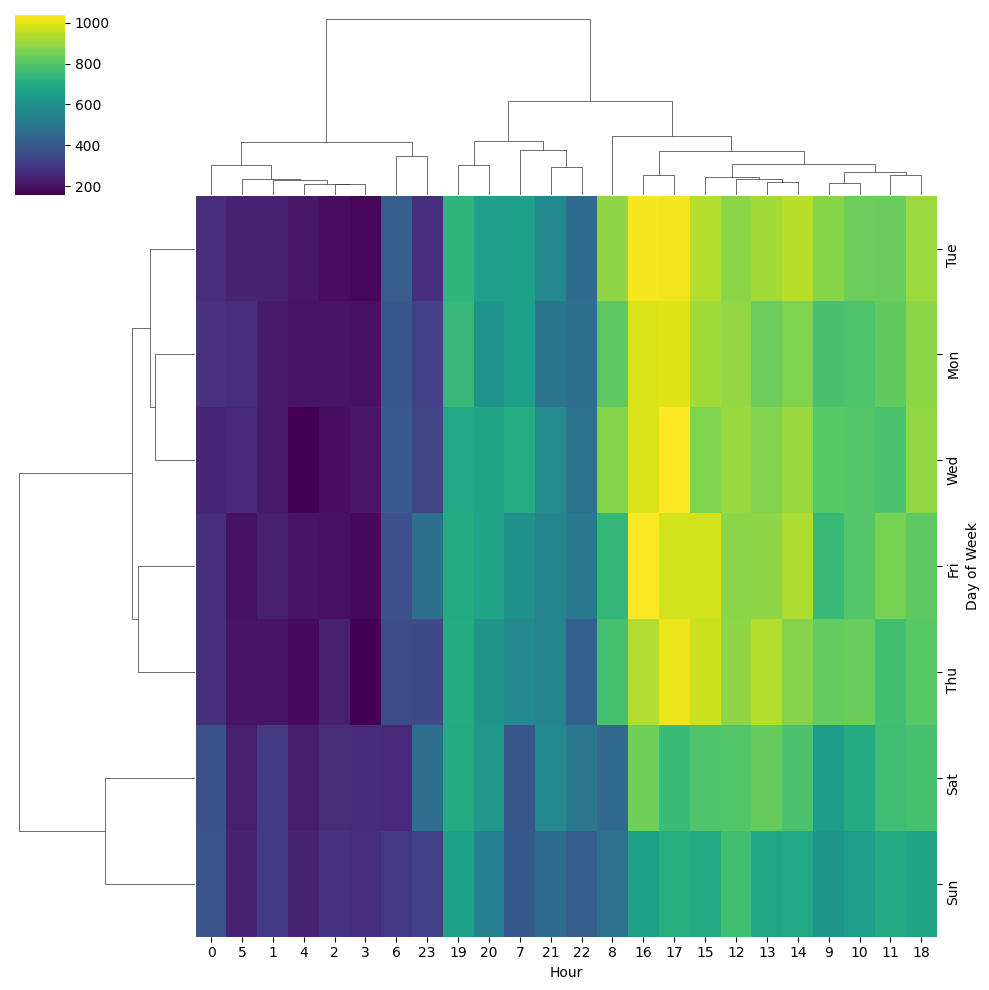

In [29]:
sns.clustermap(data = dayHour, cmap='viridis')

**Reestruturando o dataframe, onde as linhas sao os dias da semana, e as colunas os meses**

In [30]:
dayMonth = df.pivot_table(index= 'Day of Week', columns= 'Month', values = 'Reason', aggfunc = 'count')
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

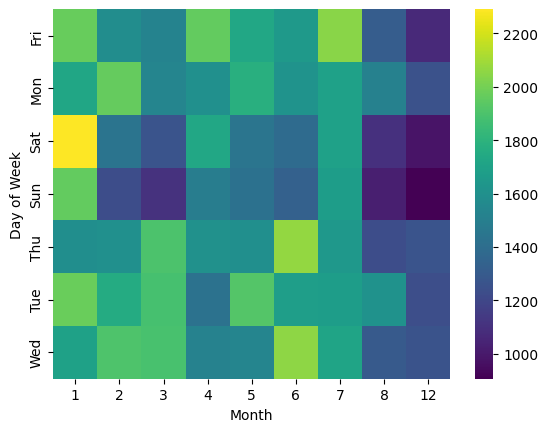

In [31]:
sns.heatmap(data= dayMonth, cmap = 'viridis')

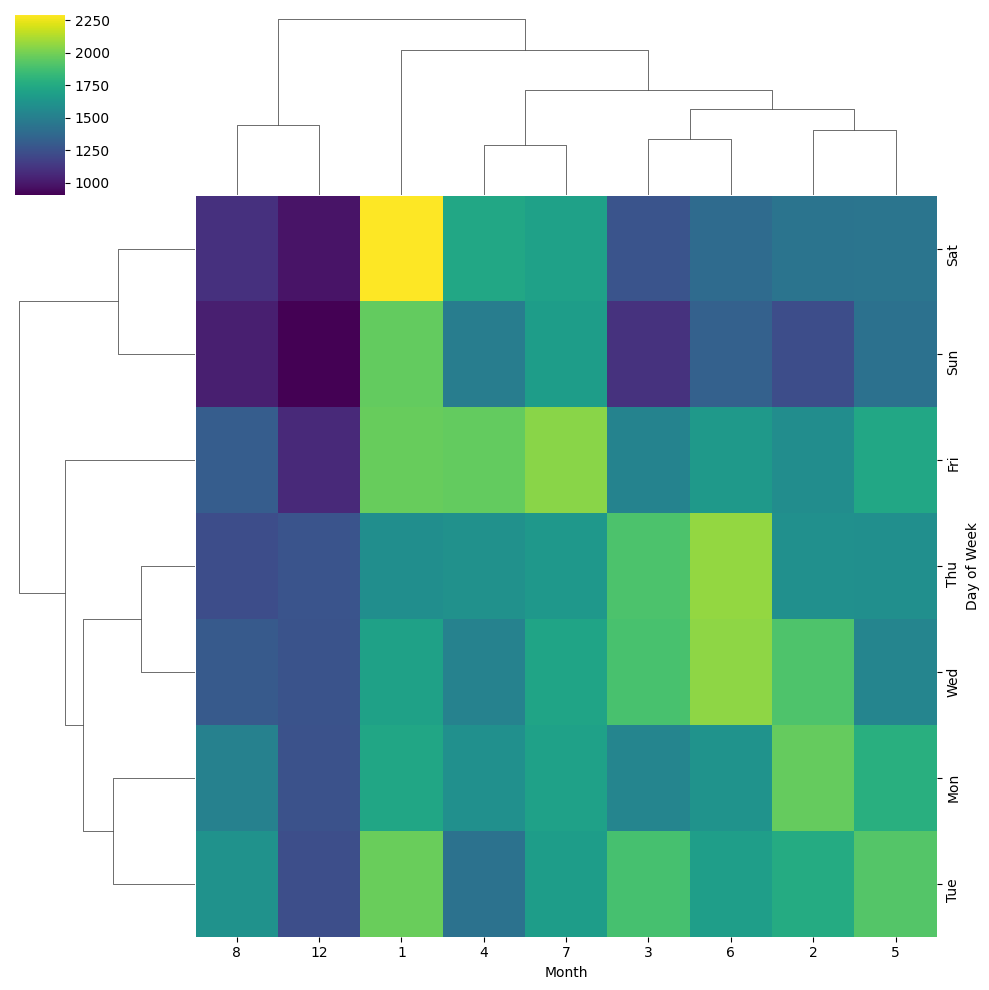

In [32]:
sns.clustermap(data= dayMonth, cmap = 'viridis')